<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Connor_Heraty_LS_DS3_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
from scipy import stats
import pandas as pd
# dir(stats)

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [4]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [14]:
import random 
import numpy as np
import scipy

population = []

for _ in range(1000):
  population.append(random.randint(0,1))
  
print(population)

[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 

In [6]:
sample = random.sample(population, 100)
print(sample)
print(len(sample))

[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
100


In [0]:
def mean(list):
  average = np.sum(list) / len(list)
  return average

#print("Population Mean:", mean(population))
#print("Sample Mean:", mean(sample))


In [0]:
def variance(list):
  n = len(list)
  return(np.sum((list - np.mean(list))**2) / (n-1))
  
#variance(df.likes_coke)

In [0]:
def stddev(list):
  var = variance(list)
  return var ** .5

#stddev(df.likes_coke)

In [10]:
df  = pd.DataFrame({'likes_coke': sample})
df.head()

df.likes_coke.mean()

0.4

In [11]:
c

-0.013404663367649335


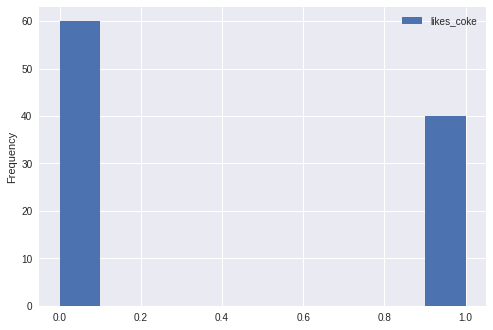

In [12]:
df.plot.hist();

In [15]:
scipy.stats.ttest_1samp(df['likes_coke'], np.mean(population))

Ttest_1sampResult(statistic=-2.2341105612748886, pvalue=0.027725203901552323)

In [16]:
df.likes_coke.describe()

count    100.000000
mean       0.400000
std        0.492366
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: likes_coke, dtype: float64

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
data = pd.read_csv('house-votes-84.txt', sep=",", header=None)

In [19]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# Rename column titles to those specified by data source
data = data.rename({0: 'Class Name',
            1: 'handicapped-infants',
            2: 'water-project-cost-sharing',
            3: 'adoption-of-the-budget-resolution',
            4: 'physician-fee-freeze',
            5: 'el-salvador-aid',
            6: 'religious-groups-in-schools',
            7: 'anti-satellite-test-ban',
            8: 'aid-to-nicaraguan-contras',
            9: 'mx-missile',
            10: 'immigration',
            11: 'synfuels-corporation-cutback',
            12: 'education-spending',
            13: 'superfund-right-to-sue',
            14: 'crime',
            15: 'duty-free-exports',
            16: 'export-administration-act-south-africa'},
           axis=1)

In [21]:
data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# Replace '?' with NaN values for further analysis
import numpy as np
data = data.replace('?', np.NaN)

In [0]:
data.info()

In [0]:
data.isnull().sum()

I've decided to drop all rows that contain missing values. There is still enough clean data to run statistically significant experimentation on.

In [0]:
df_all = data.dropna()

In [78]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
Class Name                                232 non-null object
handicapped-infants                       232 non-null object
water-project-cost-sharing                232 non-null object
adoption-of-the-budget-resolution         232 non-null object
physician-fee-freeze                      232 non-null object
el-salvador-aid                           232 non-null object
religious-groups-in-schools               232 non-null object
anti-satellite-test-ban                   232 non-null object
aid-to-nicaraguan-contras                 232 non-null object
mx-missile                                232 non-null object
immigration                               232 non-null object
synfuels-corporation-cutback              232 non-null object
education-spending                        232 non-null object
superfund-right-to-sue                    232 non-null object
crime                      

In [0]:
# Replace 'n' and 'y' with 0's and 1's
df_all = df_all.replace({'n':0, 'y':1})

In [80]:
df_all.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [0]:
# Create seperate dataframes for republican/democrat
df_rep = df_all.loc[data_pol["Class Name"] == 'republican']
df_dem = df_all.loc[data_pol["Class Name"] == 'democrat']

In [90]:
# Refactored table to see what issues to test

grouped = df_all.groupby(["Class Name"]).mean()
grouped = grouped.T
grouped['abs difference'] = abs(clean_df['democrat'] - clean_df['republican'])
grouped.sort_values(by = ['abs difference'], ascending=False)
grouped

Class Name,democrat,republican,abs difference
handicapped-infants,0.588710,0.212963,0.375747
water-project-cost-sharing,0.451613,0.472222,0.020609
adoption-of-the-budget-resolution,0.854839,0.157407,0.697431
physician-fee-freeze,0.048387,0.990741,0.942354
el-salvador-aid,0.201613,0.953704,0.752091
religious-groups-in-schools,0.443548,0.870370,0.426822
anti-satellite-test-ban,0.766129,0.268519,0.497611
aid-to-nicaraguan-contras,0.830645,0.148148,0.682497
mx-missile,0.790323,0.138889,0.651434
immigration,0.532258,0.574074,0.041816


## Answers:

- Democrat support: Adoption of the Budget Resolution
- Republican support: Physician Fee Freeze
- Neutral support: Water Project Cost Sharing

In [91]:
# Lowest p-value for republican support over democrat
scipy.stats.ttest_ind(df_rep['physician-fee-freeze'], df_dem['physician-fee-freeze'])

Ttest_indResult(statistic=41.94745401614099, pvalue=9.726393032601933e-110)

In [92]:
# Lowest p-value for democrat support over republican
scipy.stats.ttest_ind(df_dem['adoption-of-the-budget-resolution'], df_rep['adoption-of-the-budget-resolution'])

Ttest_indResult(statistic=14.742943396634677, pvalue=4.458031105913572e-35)

In [93]:
# Issue where the difference is not statistically significant
scipy.stats.ttest_ind(df_dem['water-project-cost-sharing'], df_rep['water-project-cost-sharing'])

Ttest_indResult(statistic=-0.3128208943045492, pvalue=0.7547001979801332)

Refactored function for quick analysis.

In [0]:
def t_tester(param):
    
  x = scipy.stats.ttest_ind(df_rep[param], df_dem[param])
  print(x)

In [103]:
t_tester('physician-fee-freeze')

Ttest_indResult(statistic=41.94745401614099, pvalue=9.726393032601933e-110)


# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars